In [1]:

# Рассмотрим датасет бронирований отелей


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
bookings = pd.read_csv('/home/jupyter-v.startu-4/shared/homeworks/python_ds_miniprojects/2/bookings.csv', sep=';')

In [4]:
# Посмотрим на данные

bookings.head(7)

# Бросается в глаза то, что колонки названы неудобным для анализа данных образом.
# Изменим это.

,Hotel,Is Canceled,Lead Time,arrival full date,Arrival Date Year,Arrival Date Month,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,...,Adults,Children,Babies,Meal,Country,Reserved Room Type,Assigned room type,customer type,Reservation Status,Reservation status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-03


In [5]:
# Напишем функцию для переименования колонок,
# чтобы не делать это вручную (21 колонка - это не шутки:))

def to_lower_underscore(name):
    return name.lower().replace(' ', '_')

In [6]:
# Применим функцию и перезапишем датафрейм

bookings = bookings.rename(columns=to_lower_underscore)

In [7]:
# Проверим, что колонки переименованы корректно

bookings.head()

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,adults,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03


In [24]:
# Посмотрим, пользователи каких стран совершили наибольшее число удачных,
# т.е. не отменённых позднее, бронирований

top_5_countries_with_good_bookings = bookings \
                                              .query('is_canceled == 0')\
                                              .groupby('country', as_index=False)\
                                              .agg({'is_canceled': 'count'})\
                                              .rename(columns={'is_canceled': 'good_bookings'}) \
                                              .sort_values('good_bookings', ascending=False)\
                                              .head() 

In [26]:
# Построим график

x = top_5_countries_with_good_bookings.country
y = top_5_countries_with_good_bookings.good_bookings

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
        )])

fig.show()

# 1-е место - PRT == Пуэрто-Рико!

In [9]:
# Узнаем, на сколько ночей в среднем бронируют отели типа City Hotel и Resort Hotel

bookings \
      .groupby('hotel', as_index=False)\
      .agg({'stays_total_nights': 'mean'})\
      .round(2)

# Всё ясно: на курорте, в отличие от города, всегда хочется задержаться хоть на денёчек, но подольше:)

,hotel,stays_total_nights
0,City Hotel,2.98
1,Resort Hotel,4.32


In [10]:
# Проверим, в скольких случаях тип полученного клиентом номера
# отличался от зарезервированного

bookings \
      .query('assigned_room_type != reserved_room_type')\
      .shape

# 14917 бронирований. Будем надеяться, что если такое происходит, то только 
# для того, чтобы поселить вас в президентский люкс:)

(14917, 21)

In [43]:
# Итересно, какой месяц 2016 года был самым популярным для бронирования?

bookings_2016 = bookings \
                          .query('arrival_date_year == 2016')\
                          .groupby('arrival_date_month', as_index=False)\
                          .agg({'hotel': 'count'})\
                          .rename(columns={'hotel': 'bookings'})

In [44]:
# Посмотрим на данные. Апрель, Август...Ох уж эта сортировка по алфавиту:)

bookings_2016

,arrival_date_month,bookings
0,April,5428
1,August,5063
2,December,3860
3,February,3891
4,January,2248
5,July,4572
6,June,5292
7,March,4824
8,May,5478
9,November,4454


In [45]:
# Определим сами, какой порядок месяцев правильный, приведём эту колонку к категориальной

arrival_date_month = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
bookings_2016['arrival_date_month'] = pd.Categorical(bookings_2016['arrival_date_month'], categories=arrival_date_month, ordered=True)

In [46]:
# Отсортируем

bookings_2016.sort_values('arrival_date_month', inplace=True)

In [47]:
# Вот теперь правильно

bookings_2016

,arrival_date_month,bookings
4,January,2248
3,February,3891
7,March,4824
0,April,5428
8,May,5478
6,June,5292
5,July,4572
1,August,5063
11,September,5394
10,October,6203


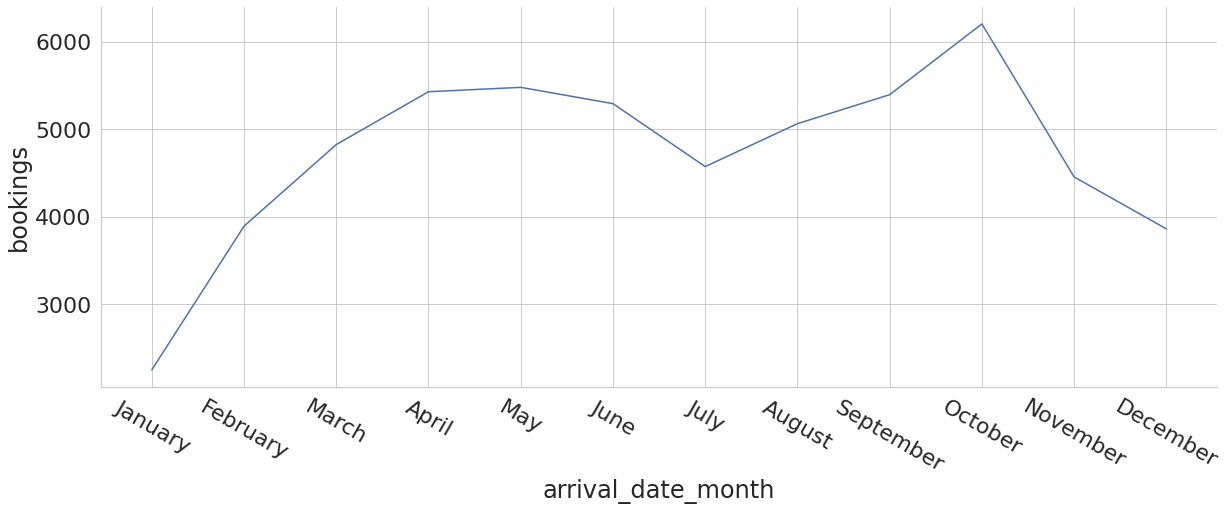

In [62]:
# Построим график

sns.set(
    
    font_scale = 2,
    style      = 'whitegrid',
    rc         = {'figure.figsize':(20, 7)}
)
sns.lineplot(data=bookings_2016, x='arrival_date_month', y='bookings')
plt.xticks(rotation=-30)
sns.despine()

# October

In [63]:
# А в 2017 году?

bookings_2017 = bookings \
                          .query('arrival_date_year == 2017')\
                          .groupby('arrival_date_month', as_index=False)\
                          .agg({'hotel': 'count'})\
                          .rename(columns={'hotel': 'bookings'})

In [64]:
bookings_2017['arrival_date_month'] = pd.Categorical(bookings_2017['arrival_date_month'], categories=arrival_date_month, ordered=True)

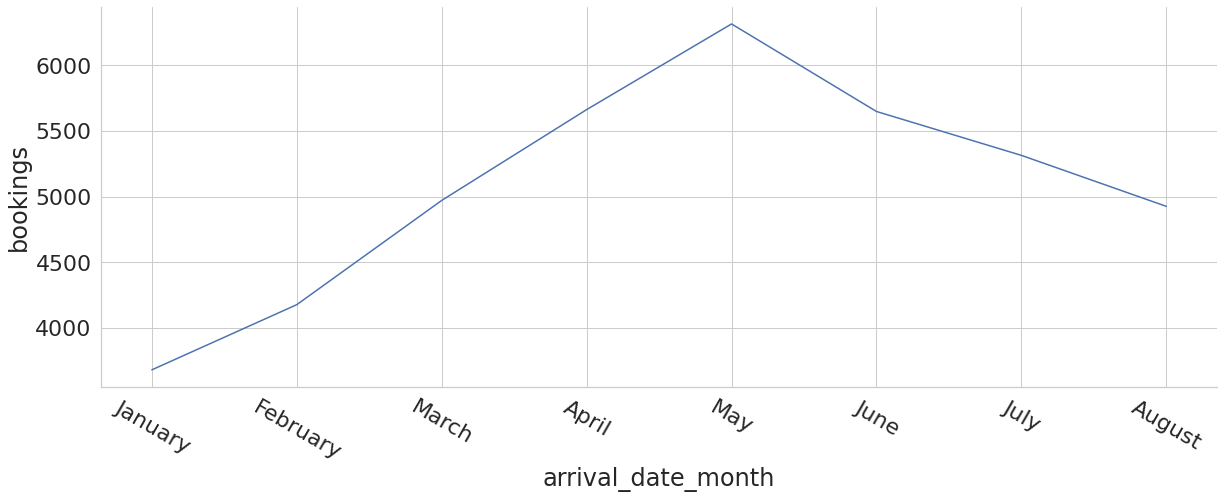

In [68]:
# Построим график для 2017 года

sns.set(
    
    font_scale = 2,
    style      = 'whitegrid',
    rc         = {'figure.figsize':(20, 7)}
)
sns.lineplot(data=bookings_2017, x='arrival_date_month', y='bookings')
plt.xticks(rotation=-30)
sns.despine()

In [13]:
# А теперь посмотрим в какие месяцы было отменено больше всего бронирований.
# Представим данные в виде ТОП-10 антирейтинга месяц-год-отменённые бронирования.

bookings \
      .query('hotel == "City Hotel" and is_canceled == 1')\
      .groupby(['arrival_date_month', 'arrival_date_year'], as_index=False)\
      .agg({'is_canceled': 'count'})\
      .sort_values('is_canceled', ascending=False)\
      .head(10)

,arrival_date_month,arrival_date_year,is_canceled
19,May,2017,2217
23,October,2016,1947
1,April,2017,1926
15,June,2017,1808
14,June,2016,1720
25,September,2016,1567
24,September,2015,1543
0,April,2016,1539
18,May,2016,1436
21,November,2016,1360


In [14]:
# Объединим детей(babies) и детей(children) просто в детей total_kids 

bookings['total_kids'] = bookings.babies + bookings.children

In [15]:
# И посмотрим, какие же отели чаще посещают клиенты с детьми 

bookings \
          .query('total_kids != 0')\
          .groupby('hotel', as_index=False)\
          .agg({'total_kids': 'mean'})\
          .round(2)

# Конечно курортные! Ведь в City Hotel часто приезжают в коммандировки,
# а на отдых обязательно с детьми:)

,hotel,total_kids
0,City Hotel,1.41
1,Resort Hotel,1.45


In [16]:
# Создадим дополнительный атрибут, показывающий наличие у клиента детей при бронировании

bookings['has_kids'] = bookings.total_kids > 0

In [17]:
# Посчитаем Churn rate (отток) для клиентов без детей

round(bookings \
      .query('has_kids == False and is_canceled == 1')\
      .shape[0] / bookings\
      .query('has_kids == False').shape[0] * 100, 2)

37.22

In [18]:
# Churn rate (отток) для клиентов с детьми

round(bookings \
      .query('has_kids == True and is_canceled == 1')\
      .shape[0] / bookings\
      .query('has_kids == True').shape[0] * 100, 2)

34.92

In [71]:
# Посмотрим, почему клиенты с детьми меньше попадают в Churn rate 

In [73]:
bookings\
.groupby(['hotel', 'is_canceled'], as_index=False)\
.agg({'arrival_date_month': 'count'})\
.rename(columns={'arrival_date_month': 'bookings_count'})

,hotel,is_canceled,bookings_count
0,City Hotel,0,46228
1,City Hotel,1,33102
2,Resort Hotel,0,28938
3,Resort Hotel,1,11122


In [72]:
#     Отток клиентов с детьми меньше, потому что отменяют 
#     бронирования клиенты с детьми, которые, как мы помним,
#     чаще ездят в курортные отели, меньше. Отпуск для ребёнка - это святое:)